In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
import sklearn
import pandas as pd
import codecs

root = '/home/anders/ml/BDA2018_aarhus/data/'
def read_energi_data(f):
    with codecs.open(root+f,encoding='8859') as f:
        col = []
        l=f.readline().strip()
        while l:
            col.append(' '.join(l.split()[1:]))
            l=f.readline().strip()
        
        dat = pd.read_csv(f,sep=';', skipinitialspace=True,lineterminator ='\n',infer_datetime_format=True)
        dat = dat.drop(dat.columns[-1],1)
        
        dat.columns = [dat.columns[0]] + col
        dat = dat.set_index(dat.columns[0])
    return dat

In [8]:
energi = read_energi_data('20161208_onlinedata.txt')
co2 = energi['CO2 udledning']

In [9]:
energi=energi.drop(['Temperatur i Malling','Vindhastighed i Malling'],axis=1)
energi=energi.drop('CO2 udledning',axis=1)
energi=energi.drop('Havmøller DK',axis=1)
energi=energi.drop('Landmøller DK',axis=1)

In [10]:
from sklearn.svm import SVR
svr_model = SVR(kernel='linear')
svr_model_non = SVR(kernel='rbf')

In [11]:
#Training these takes a LONG time!
svr_model.fit(energi,co2)
svr_model_non.fit(energi,co2)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

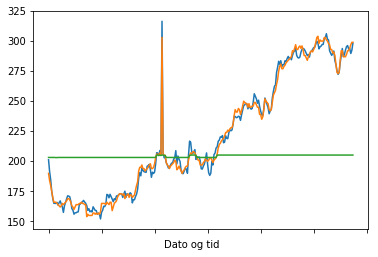

In [12]:
predict = svr_model.predict(energi)
predict_non = svr_model_non.predict(energi)
plot(predict)
co2.plot()
plot(predict_non)

In [13]:
svr_model.score(energi,co2)

0.9922806916061307

In [14]:
svr_model_non.score(energi,co2)

-0.07538305465529715